# E-commerce Shopper's Behaviour Understanding


### Problem Statement

Assume that you are working in a consultancy company and one of your client is running an e-commerce company. They are interested in understanding the customer behavior regarding the shopping. They have already collected the users’ session data for a year. Each row belongs to a different user. The “Made_purchase” is an indicator that whether the user has made a purchase or not during that year. Your client is also interested in predicting that column using other attributes of the users. The client also informs you that the data is collected by non-experts. So, it might have some percentage of error in some columns.

### Columns

The first six columns represent the different pages in the e-commerce website visited by a user from other sites.

HomePage: Number of times visited this page

HomePage_Duration: Total number of duration spent on this page.

LandingPage: Number of times visited this page

LandingPage_Duration: Total number of duration spent on this page.

ProductDesriptionPage Number of times visited this page

ProductDescriptionPage_Duration: Total number of duration spent on this page.

GoogleMetric-Bounce Rate: Whenever a user comes to any one web-page of the website and he/she does not go to any other page and exits from the website from the same page, then this activity done by the user is called Bounce. And the percentage of the total number of times the user visiting our website and bounce it, is called Bounce Rate

GoogleMetric-Exit Rate: The bounce rate is calculated based on the user exiting a website after visiting one page. But some users exit from the second, third, fourth, or any other page of our website, then those visitors’ data help determine the exit rate. The percentage of the total number of times the user to our website who do not exit from the first page (Landing Page) but exit after exploring other website pages is called the Exit Rate.

GoogleMetric-Page Value: Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction.

SeasonalPurchase: It is a weight indicator to track the seasonal purchase. If a user makes a purchase during any seasonal time (Mother’s Day, Diwali, Valentine's Day), we will assign based on internal heuristic.

Month_ SeasonalPurchase: Month of the special day considered for seasonal purchase.

The other attributes like, OS, Search Engine, Zone, Type of Traffic, Customer Type, Gender, Cookies Setting, Education, Marital Status and Weekend Purchase are self-explanatory variables

### Evaluation Metric

The evaluation metric for this competition is [Mean F1-Score](https://en.wikipedia.org/wiki/F-score)

In [1]:
# Import all the necessary modules 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:
#Loading Data into dataframes

train_df=pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')
test_df=pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')

### Exploratory Data analysis

In [3]:
#train dataset shape
train_df.shape

(14731, 22)

In [4]:
#test dataset shape
test_df.shape

(6599, 21)

In [5]:
# top 5 rows to see how data looks
train_df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [6]:
test_df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,1.0,Returning_Visitor,Not Specified,Deny,Not Specified,Single,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,2.0,1.0,2.0,Returning_Visitor,Not Specified,ALL,Graduate,Married,0.0
2,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,2.0,1.0,3.0,Returning_Visitor,Female,Required,Diploma,Other,0.0
3,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,2.0,3.0,Returning_Visitor,Not Specified,Required,Graduate,Other,0.0
4,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,1.0,4.0,3.0,Returning_Visitor,Female,Deny,Others,Other,0.0


In [7]:
train_df.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [8]:
test_df.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,6548.000000,6544.000000,6543.000000,6524.000000,6541.000000,6536.000000,6533.000000,6548.000000,6554.000000,6554.000000,6537.000000,6541.000000,6552.000000,6531.000000,6541.000000
mean,2.283293,76.994609,0.494727,32.907760,30.742088,1151.231143,0.022392,0.043874,4.982108,0.064297,2.134006,2.357743,3.184676,4.041954,0.227947
std,3.345387,168.679695,1.272524,134.683314,43.539549,1917.250309,0.048374,0.048290,17.635847,0.202678,0.909340,1.721375,2.407328,4.027747,0.419540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,172.127778,0.000000,0.014543,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,4.875000,0.000000,0.000000,17.000000,570.341614,0.003165,0.026458,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,91.000000,0.000000,0.000000,37.000000,1425.750000,0.017778,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,26.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [9]:
corr_matrix=train_df.corr()
corr_matrix['Made_Purchase'].sort_values(ascending=False)

Made_Purchase                      1.000000
GoogleMetric:Page Values           0.205206
ProductDescriptionPage             0.068328
ProductDescriptionPage_Duration    0.066225
HomePage                           0.052235
LandingPage                        0.042832
HomePage_Duration                  0.042043
LandingPage_Duration               0.027151
WeekendPurchase                    0.010922
SearchEngine                       0.009360
OS                                 0.001111
Type of Traffic                   -0.004270
Zone                              -0.011090
SeasonalPurchase                  -0.017940
GoogleMetric:Bounce Rates         -0.053724
GoogleMetric:Exit Rates           -0.071258
Name: Made_Purchase, dtype: float64

In [10]:
train_df.dtypes

HomePage                           float64
HomePage_Duration                  float64
LandingPage                        float64
LandingPage_Duration               float64
ProductDescriptionPage             float64
ProductDescriptionPage_Duration    float64
GoogleMetric:Bounce Rates          float64
GoogleMetric:Exit Rates            float64
GoogleMetric:Page Values           float64
SeasonalPurchase                   float64
Month_SeasonalPurchase              object
OS                                 float64
SearchEngine                       float64
Zone                               float64
Type of Traffic                    float64
CustomerType                        object
Gender                              object
Cookies Setting                     object
Education                           object
Marital Status                      object
WeekendPurchase                    float64
Made_Purchase                         bool
dtype: object

In [11]:
train_df.nunique()

HomePage                             27
HomePage_Duration                  2844
LandingPage                          17
LandingPage_Duration               1084
ProductDescriptionPage              294
ProductDescriptionPage_Duration    7933
GoogleMetric:Bounce Rates          1628
GoogleMetric:Exit Rates            4051
GoogleMetric:Page Values           2120
SeasonalPurchase                      6
Month_SeasonalPurchase               10
OS                                    8
SearchEngine                         13
Zone                                  9
Type of Traffic                      20
CustomerType                          3
Gender                                3
Cookies Setting                       3
Education                             4
Marital Status                        3
WeekendPurchase                       2
Made_Purchase                         2
dtype: int64

In [12]:
#it is showing in float this can treated as object 

train_df['SeasonalPurchase']=train_df['SeasonalPurchase'].astype('object')
train_df['OS']=train_df['OS'].astype('object')
train_df['SearchEngine']=train_df['SearchEngine'].astype('object')
train_df['Zone']=train_df['Zone'].astype('object')
train_df['WeekendPurchase']=train_df['WeekendPurchase'].astype('object')
train_df['Type of Traffic']=train_df['Type of Traffic'].astype('object')

# applying same to test
test_df['SeasonalPurchase']=test_df['SeasonalPurchase'].astype('object')
test_df['OS']=test_df['OS'].astype('object')
test_df['SearchEngine']=test_df['SearchEngine'].astype('object')
test_df['Zone']=test_df['Zone'].astype('object')
test_df['WeekendPurchase']=test_df['WeekendPurchase'].astype('object')
test_df['Type of Traffic']=test_df['Type of Traffic'].astype('object')

In [13]:
# based on unique values and data let's categorize the columns into numerical and categorical

# numerical columns
num_cols=[col for col in train_df.columns if train_df[col].dtype =='float64']

# categorical columns

cat_cols=[col for col in train_df.columns if train_df[col].dtype =='object']

# target column

target="Made_Purchase"


### Missing Values and Outliers

In [14]:
train_df.isnull().sum(axis=0)

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [15]:
num_cols

['HomePage',
 'HomePage_Duration',
 'LandingPage',
 'LandingPage_Duration',
 'ProductDescriptionPage',
 'ProductDescriptionPage_Duration',
 'GoogleMetric:Bounce Rates',
 'GoogleMetric:Exit Rates',
 'GoogleMetric:Page Values']

<AxesSubplot:>

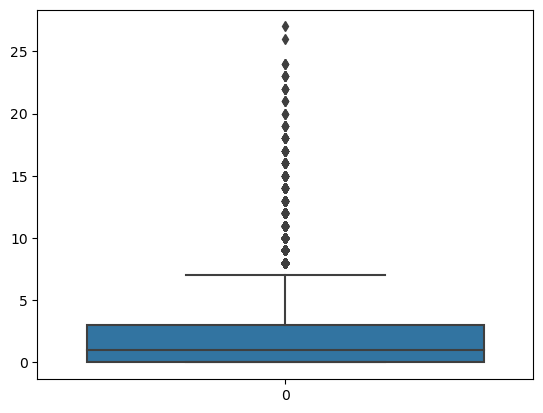

In [16]:
#check for outliers using boxplot on all numerical fetures
sns.boxplot(train_df['HomePage'])

<AxesSubplot:>

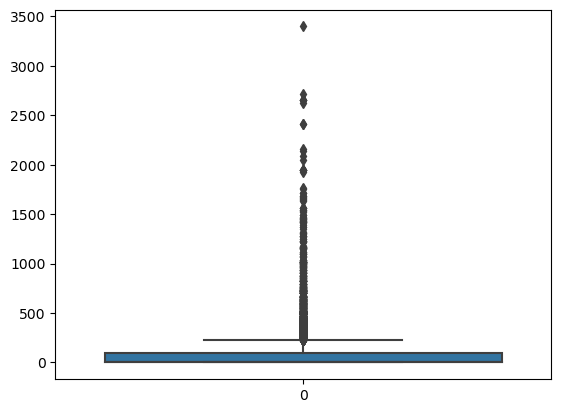

In [17]:
sns.boxplot(train_df['HomePage_Duration'])

<AxesSubplot:>

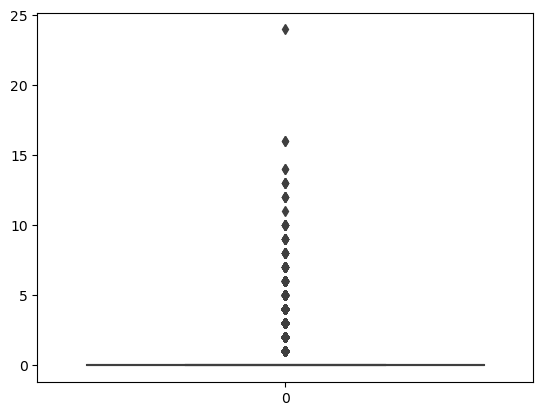

In [18]:
sns.boxplot(train_df['LandingPage'])

<AxesSubplot:>

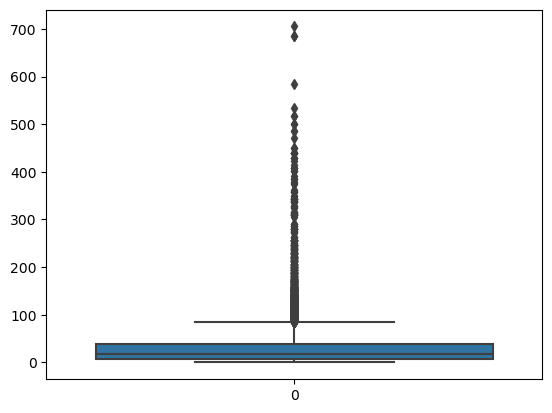

In [19]:
sns.boxplot(train_df['ProductDescriptionPage'])

<AxesSubplot:>

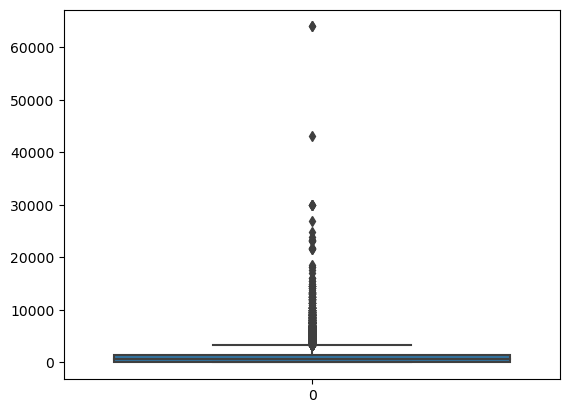

In [20]:
sns.boxplot(train_df['ProductDescriptionPage_Duration'])

<AxesSubplot:>

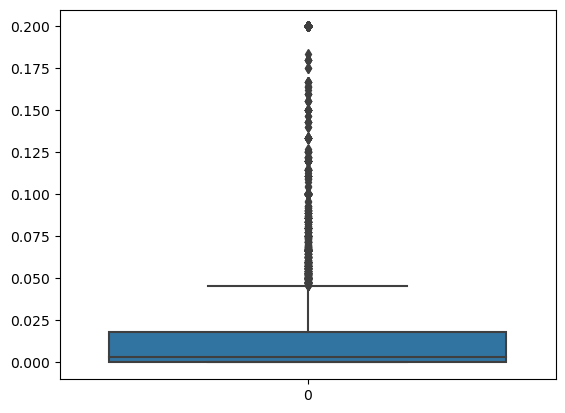

In [21]:
sns.boxplot(train_df['GoogleMetric:Bounce Rates'])

<AxesSubplot:>

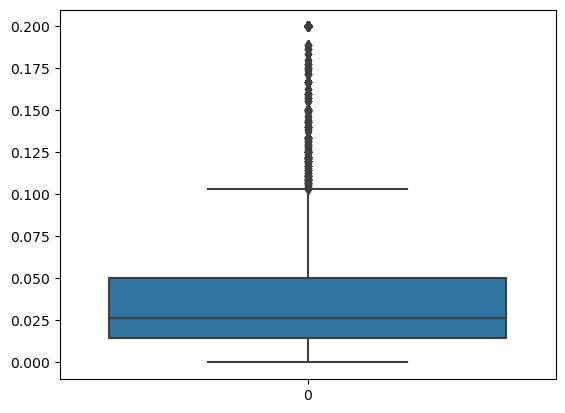

In [22]:
sns.boxplot(train_df['GoogleMetric:Exit Rates'])

<AxesSubplot:>

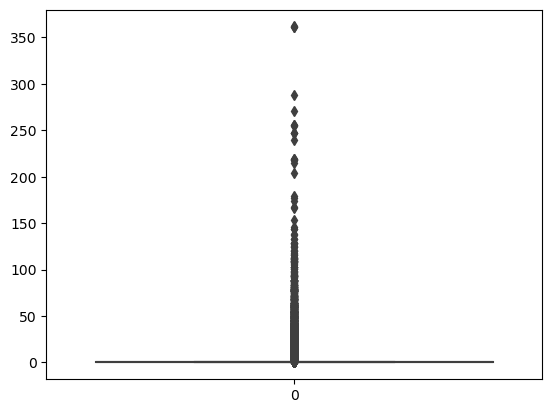

In [23]:
sns.boxplot(train_df['GoogleMetric:Page Values'])

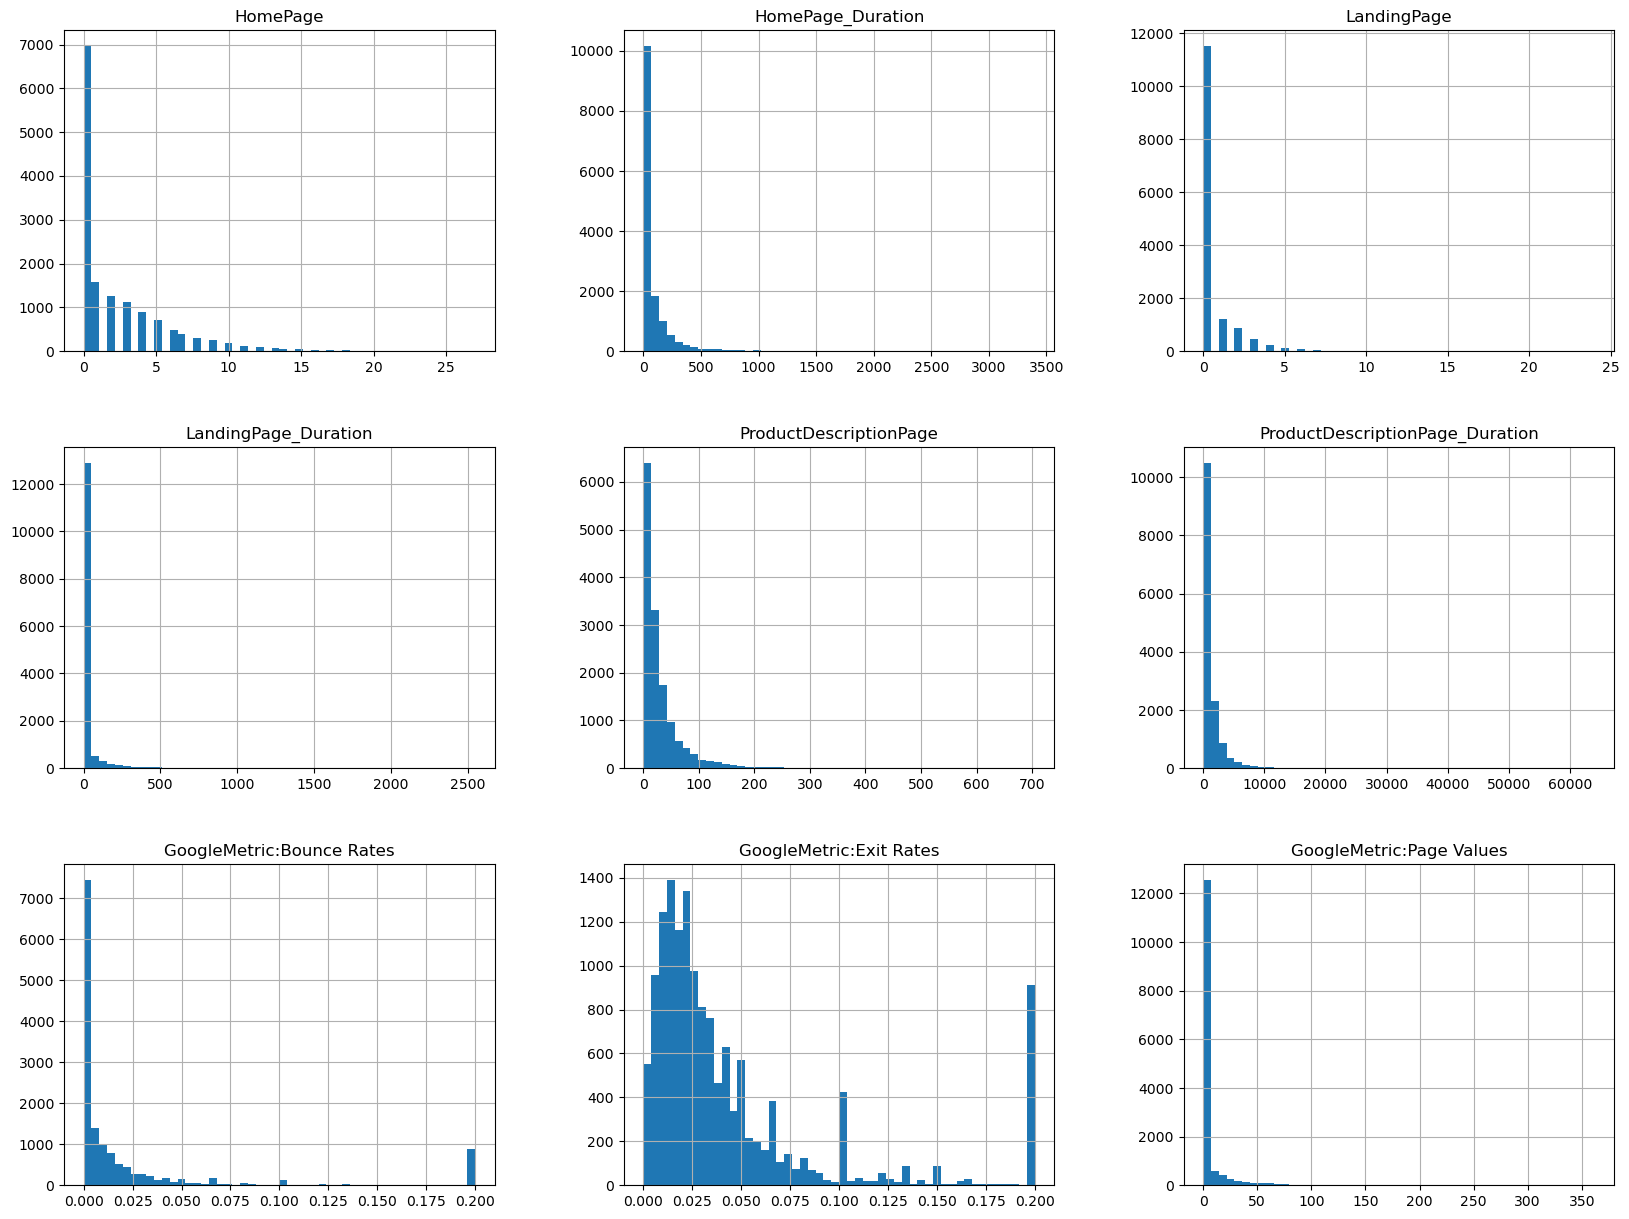

In [24]:
train_df.hist(bins=50,figsize=(20,15))
plt.show()

In [25]:
from sklearn.impute import KNNImputer
knnImp=KNNImputer()
train_df[num_cols]=knnImp.fit_transform(train_df[num_cols])
test_df[num_cols]=knnImp.transform(test_df[num_cols])

In [26]:
#Handling missing values for categorical variables
train_df[cat_cols] = train_df[cat_cols].where(pd.notnull(train_df[cat_cols]), 'NONE')
test_df[cat_cols] = test_df[cat_cols].where(pd.notnull(test_df[cat_cols]), 'NONE')

In [27]:
# Applying log transaformation to handle outliers
train_df[num_cols]=np.log1p(train_df[num_cols])
test_df[num_cols]=np.log1p(test_df[num_cols])

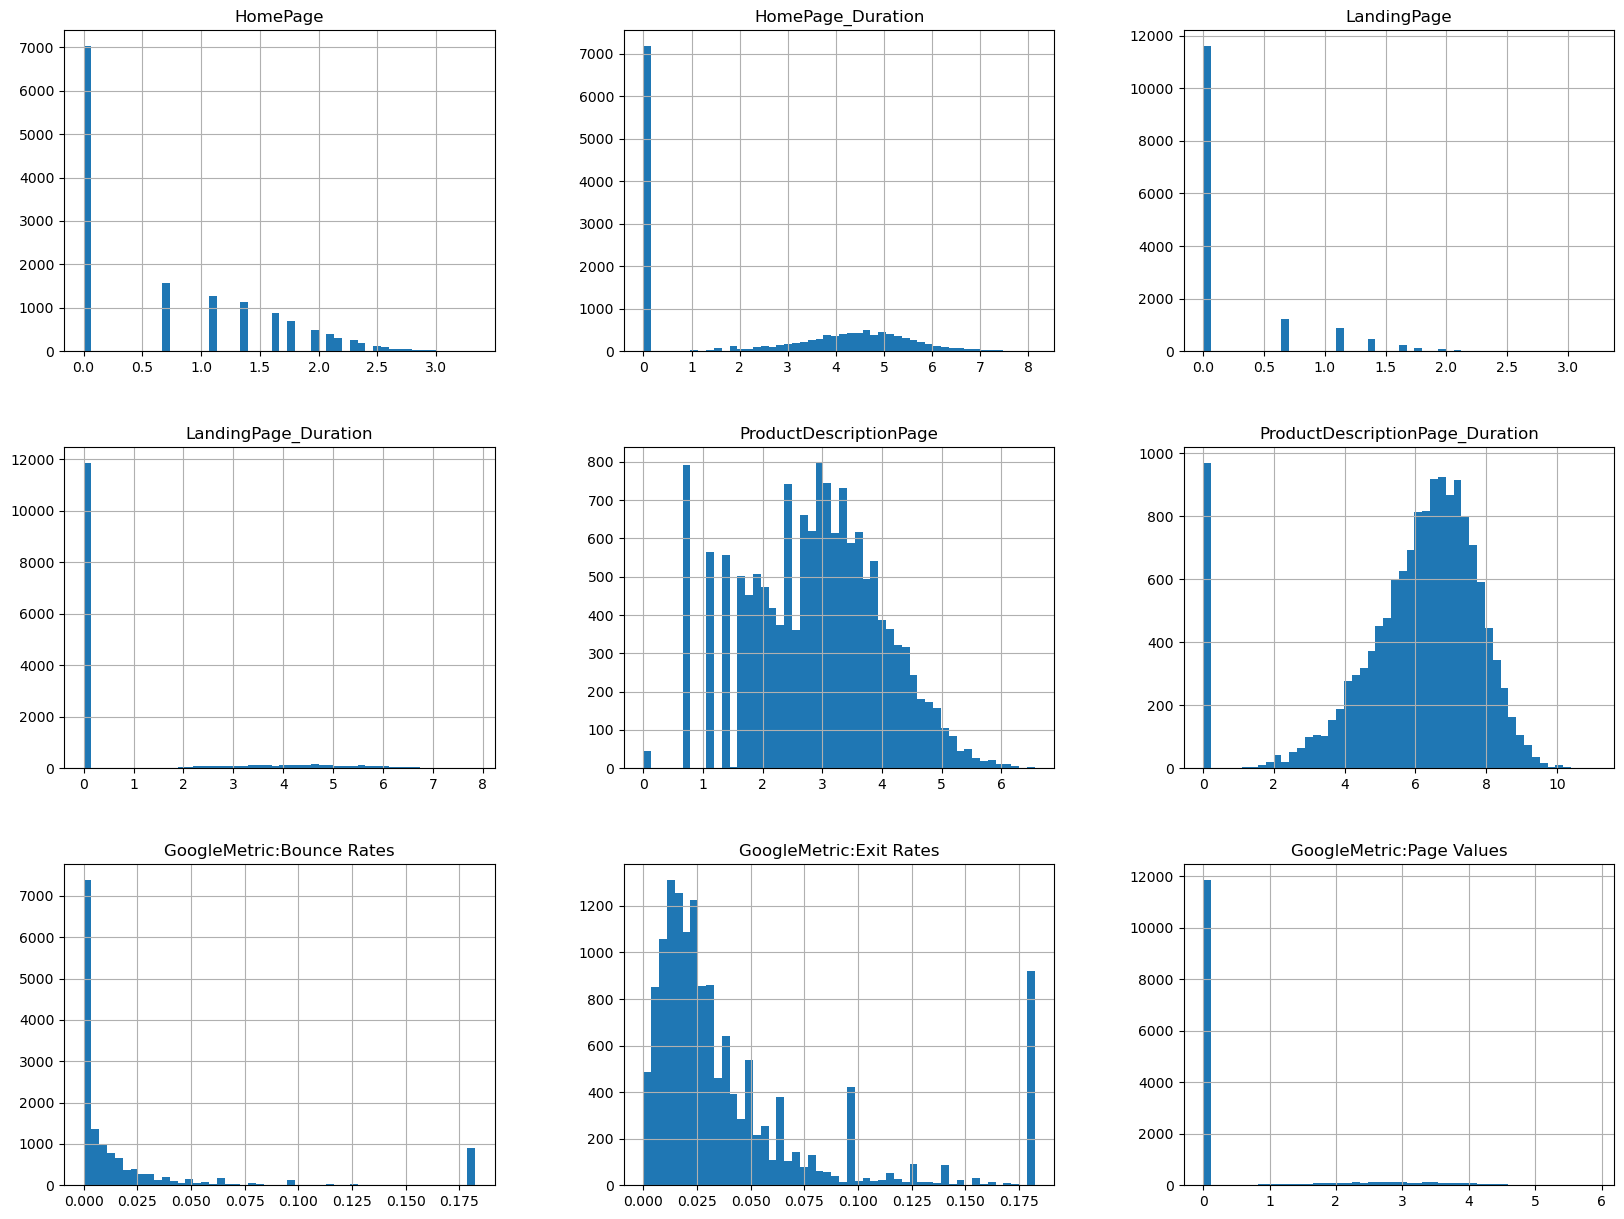

In [28]:
train_df.hist(bins=50,figsize=(20,15))
plt.show()

In [29]:
#Feature Engineering for Numerical Columns
# page and duration are correlated making it single column

train_df['Home_New']=train_df['HomePage']*train_df['HomePage_Duration']
test_df['Home_New']=test_df['HomePage']*test_df['HomePage_Duration']
train_df['Landing_New']=train_df['LandingPage']*train_df['LandingPage_Duration']
test_df['Landing_New']=test_df['LandingPage']*test_df['LandingPage_Duration']
train_df['Product_New']=train_df['ProductDescriptionPage_Duration']*train_df['ProductDescriptionPage']
test_df['Product_New']=test_df['ProductDescriptionPage_Duration']*test_df['ProductDescriptionPage']

#difference between rates tells how many pages visited

train_df['Diff_GoogleMetric_Rates']=train_df['GoogleMetric:Exit Rates']-train_df['GoogleMetric:Bounce Rates']
test_df['Diff_GoogleMetric_Rates']=test_df['GoogleMetric:Exit Rates']-test_df['GoogleMetric:Bounce Rates']

train_df['Diff_GoogleMetric_Rates_PageValues']=train_df['Diff_GoogleMetric_Rates']*train_df['GoogleMetric:Page Values']
test_df['Diff_GoogleMetric_Rates_PageValues']=test_df['Diff_GoogleMetric_Rates']*test_df['GoogleMetric:Page Values']

In [30]:
correlation_matrix=train_df.corr()
correlation_matrix['Made_Purchase'].sort_values(ascending=False)

Made_Purchase                         1.000000
GoogleMetric:Page Values              0.262681
Diff_GoogleMetric_Rates_PageValues    0.202354
Product_New                           0.081711
ProductDescriptionPage                0.076138
ProductDescriptionPage_Duration       0.070280
HomePage_Duration                     0.063297
HomePage                              0.059911
Home_New                              0.057113
LandingPage                           0.047133
LandingPage_Duration                  0.046104
Landing_New                           0.045755
Diff_GoogleMetric_Rates              -0.044095
GoogleMetric:Bounce Rates            -0.054098
GoogleMetric:Exit Rates              -0.073539
Name: Made_Purchase, dtype: float64

<AxesSubplot:>

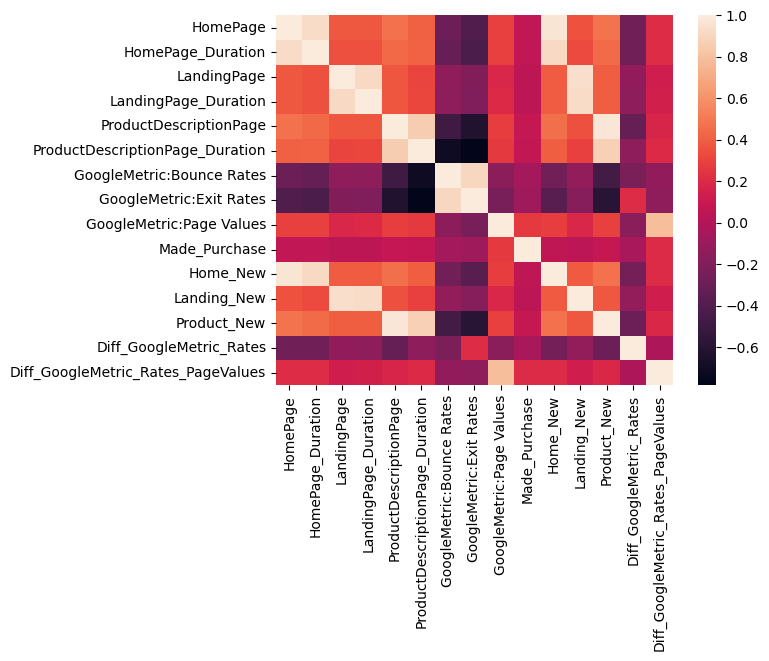

In [31]:
sns.heatmap(correlation_matrix)

In [32]:
[col for col in train_df.columns if train_df[col].dtype =='float64']

['HomePage',
 'HomePage_Duration',
 'LandingPage',
 'LandingPage_Duration',
 'ProductDescriptionPage',
 'ProductDescriptionPage_Duration',
 'GoogleMetric:Bounce Rates',
 'GoogleMetric:Exit Rates',
 'GoogleMetric:Page Values',
 'Home_New',
 'Landing_New',
 'Product_New',
 'Diff_GoogleMetric_Rates',
 'Diff_GoogleMetric_Rates_PageValues']

In [33]:
train_df['HomePage']=train_df['HomePage'].astype('object')
train_df['LandingPage']=train_df['LandingPage'].astype('object')

# applying same to test
test_df['HomePage']=test_df['HomePage'].astype('object')
test_df['LandingPage']=test_df['LandingPage'].astype('object')

In [34]:
cat_cols=[col for col in train_df.columns if train_df[col].dtype =='object']

In [35]:
cat_cols

['HomePage',
 'LandingPage',
 'SeasonalPurchase',
 'Month_SeasonalPurchase',
 'OS',
 'SearchEngine',
 'Zone',
 'Type of Traffic',
 'CustomerType',
 'Gender',
 'Cookies Setting',
 'Education',
 'Marital Status',
 'WeekendPurchase']

<AxesSubplot:xlabel='HomePage', ylabel='count'>

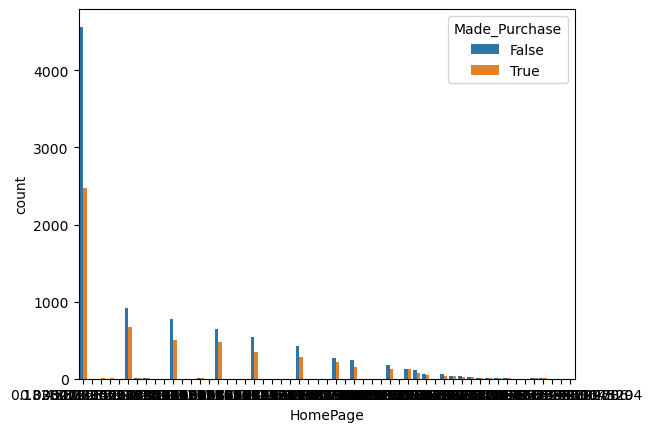

In [36]:
sns.countplot(x='HomePage',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='LandingPage', ylabel='count'>

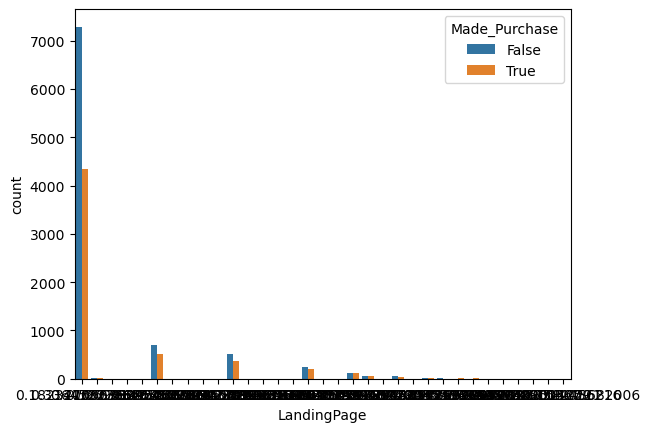

In [37]:
sns.countplot(x='LandingPage',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='SeasonalPurchase', ylabel='count'>

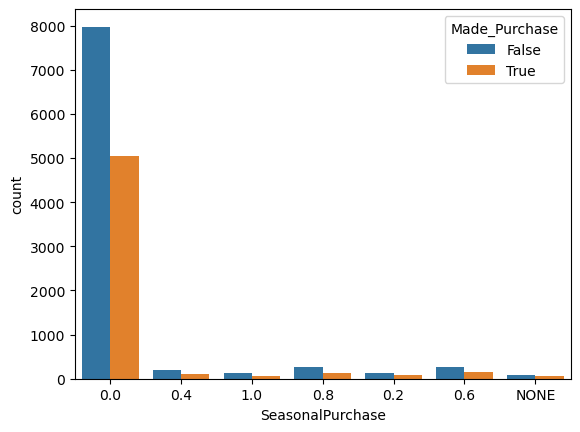

In [38]:
sns.countplot(x='SeasonalPurchase',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='Month_SeasonalPurchase', ylabel='count'>

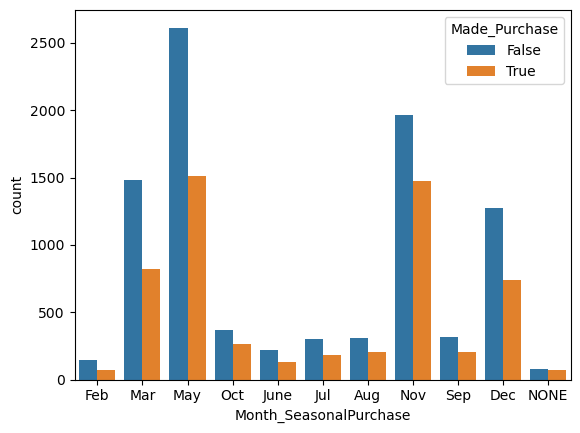

In [39]:
sns.countplot(x='Month_SeasonalPurchase',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='OS', ylabel='count'>

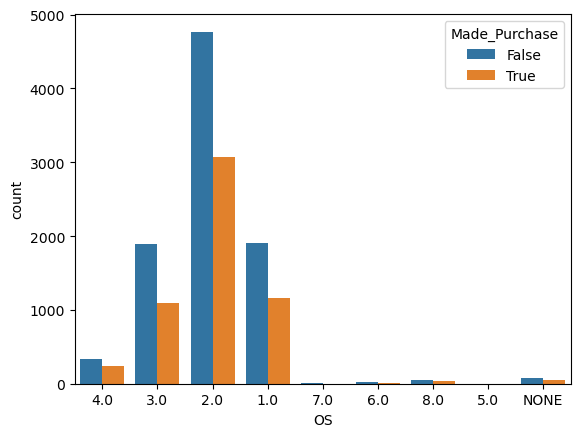

In [40]:
sns.countplot(x='OS',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='SearchEngine', ylabel='count'>

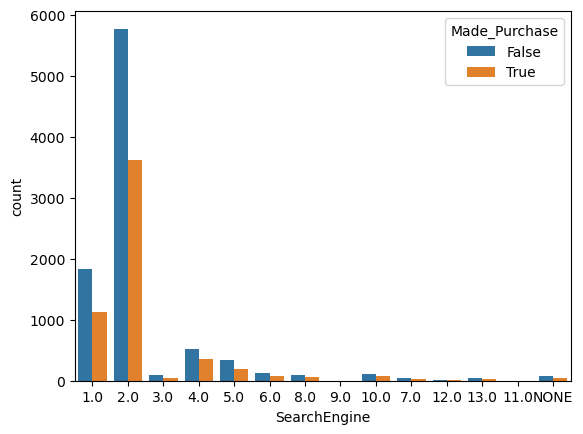

In [41]:
sns.countplot(x='SearchEngine',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='Zone', ylabel='count'>

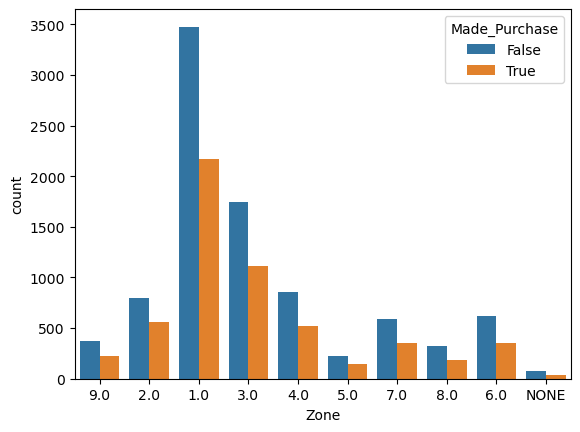

In [42]:
sns.countplot(x='Zone',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='Type of Traffic', ylabel='count'>

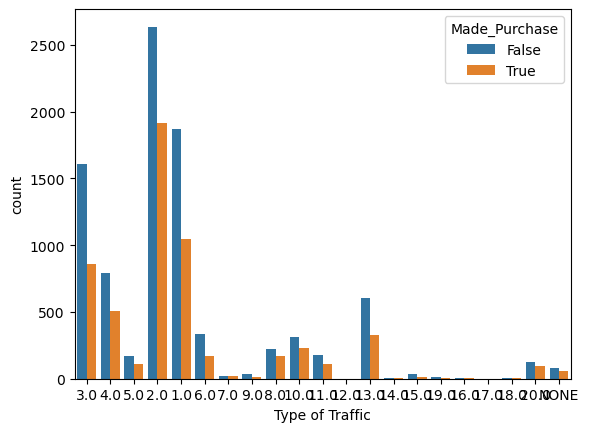

In [43]:
sns.countplot(x='Type of Traffic',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='Cookies Setting', ylabel='count'>

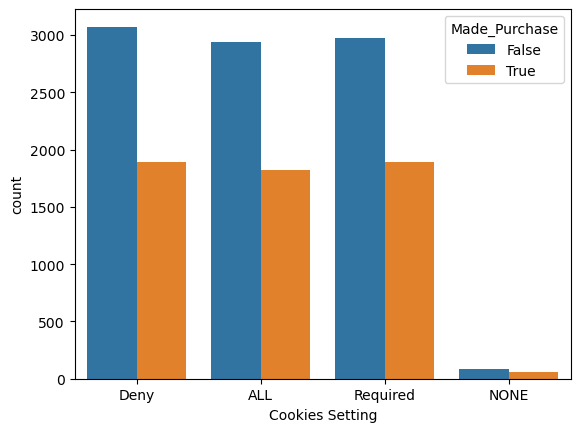

In [44]:
sns.countplot(x='Cookies Setting',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='CustomerType', ylabel='count'>

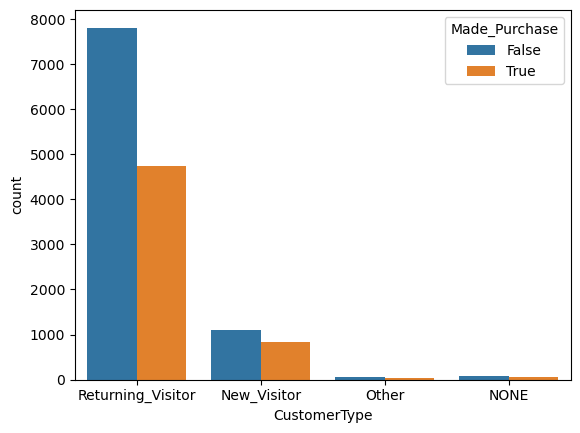

In [45]:
sns.countplot(x='CustomerType',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='Marital Status', ylabel='count'>

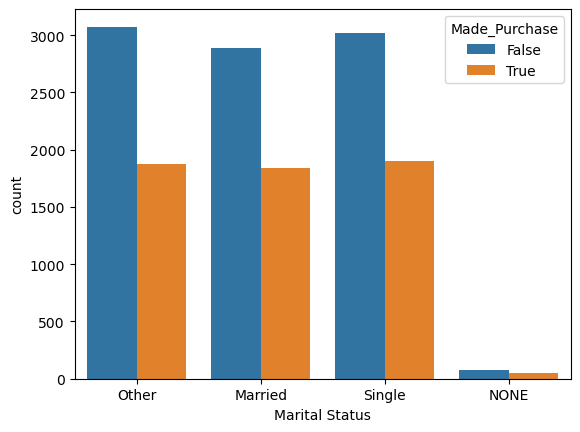

In [46]:
sns.countplot(x='Marital Status',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='Education', ylabel='count'>

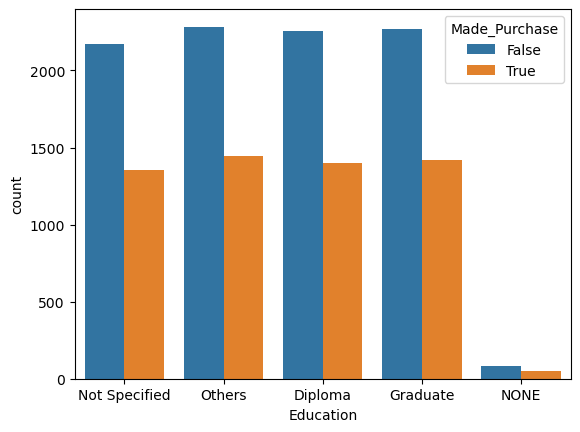

In [47]:
sns.countplot(x='Education',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='Gender', ylabel='count'>

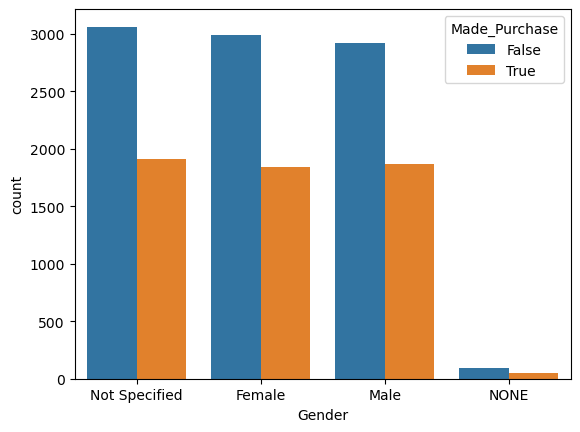

In [48]:
sns.countplot(x='Gender',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='WeekendPurchase', ylabel='count'>

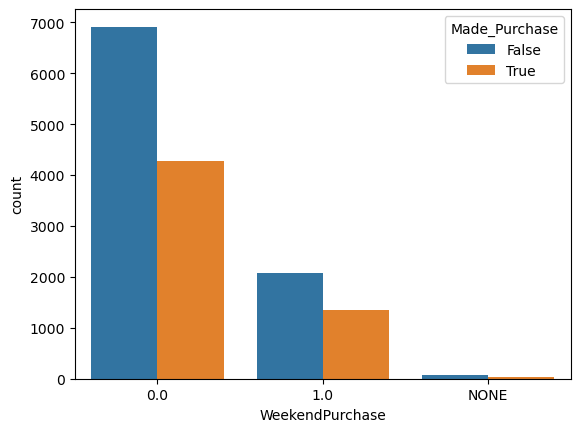

In [49]:
sns.countplot(x='WeekendPurchase',data=train_df,hue='Made_Purchase')

In [50]:
#making new feature out of below  columns

train_df['Seasonal_Month']=train_df['SeasonalPurchase'].astype(str)+"_"+train_df['Month_SeasonalPurchase'].astype(str)
test_df['Seasonal_Month']=test_df['SeasonalPurchase'].astype(str)+"_"+test_df['Month_SeasonalPurchase'].astype(str)

train_df['Seasonal_Weekend']=train_df['SeasonalPurchase'].astype(str)+"_"+train_df['WeekendPurchase'].astype(str)
test_df['Seasonal_Weekend']=test_df['SeasonalPurchase'].astype(str)+"_"+test_df['WeekendPurchase'].astype(str)

train_df['Month_Weekend']=train_df['Month_SeasonalPurchase'].astype(str)+"_"+train_df['WeekendPurchase'].astype(str)
test_df['Month_Weekend']=test_df['Month_SeasonalPurchase'].astype(str)+"_"+test_df['WeekendPurchase'].astype(str)


train_df['Seasonal_Month_Weekend']=train_df['SeasonalPurchase'].astype(str)+"_"+train_df['Month_SeasonalPurchase'].astype(str)+"_"+train_df['WeekendPurchase'].astype(str)
test_df['Seasonal_Month_Weekend']=test_df['SeasonalPurchase'].astype(str)+"_"+test_df['Month_SeasonalPurchase'].astype(str)+"_"+test_df['WeekendPurchase'].astype(str)

train_df['MaritalStatus_Gender']=train_df['Marital Status'].astype(str)+"_"+train_df['Gender'].astype(str)
test_df['MaritalStatus_Gender']=test_df['Marital Status'].astype(str)+"_"+test_df['Gender'].astype(str)

train_df['Traffic_Zone']=train_df['Zone'].astype(str)+"_"+train_df['Type of Traffic'].astype(str)
test_df['Traffic_Zone']=test_df['Zone'].astype(str)+"_"+test_df['Type of Traffic'].astype(str)

train_df['OS_SearchEngine']=train_df['OS'].astype(str)+"_"+train_df['SearchEngine'].astype(str)
test_df['OS_SearchEngine']=test_df['OS'].astype(str)+"_"+test_df['SearchEngine'].astype(str)

train_df['Traffic_Zone_OS_SearchEngine']=train_df['Traffic_Zone'].astype(str)+"_"+train_df['OS_SearchEngine'].astype(str)
test_df['Traffic_Zone_OS_SearchEngine']=test_df['Traffic_Zone'].astype(str)+"_"+test_df['OS_SearchEngine'].astype(str)

train_df['Season_Traffic_Zone_OS_SearchEngine']=train_df['SeasonalPurchase'].astype(str)+"_"+train_df['Traffic_Zone_OS_SearchEngine'].astype(str)
test_df['Season_Traffic_Zone_OS_SearchEngine']=test_df['SeasonalPurchase'].astype(str)+"_"+test_df['Traffic_Zone_OS_SearchEngine'].astype(str)



train_df['CustomerType_Education']=train_df['CustomerType'].astype(str)+"_"+train_df['Education'].astype(str)
test_df['CustomerType_Education']=test_df['CustomerType'].astype(str)+"_"+test_df['Education'].astype(str)


In [51]:
[col for col in train_df.columns if train_df[col].dtype =='object']

['HomePage',
 'LandingPage',
 'SeasonalPurchase',
 'Month_SeasonalPurchase',
 'OS',
 'SearchEngine',
 'Zone',
 'Type of Traffic',
 'CustomerType',
 'Gender',
 'Cookies Setting',
 'Education',
 'Marital Status',
 'WeekendPurchase',
 'Seasonal_Month',
 'Seasonal_Weekend',
 'Month_Weekend',
 'Seasonal_Month_Weekend',
 'MaritalStatus_Gender',
 'Traffic_Zone',
 'OS_SearchEngine',
 'Traffic_Zone_OS_SearchEngine',
 'Season_Traffic_Zone_OS_SearchEngine',
 'CustomerType_Education']

<AxesSubplot:xlabel='Traffic_Zone_OS_SearchEngine', ylabel='count'>

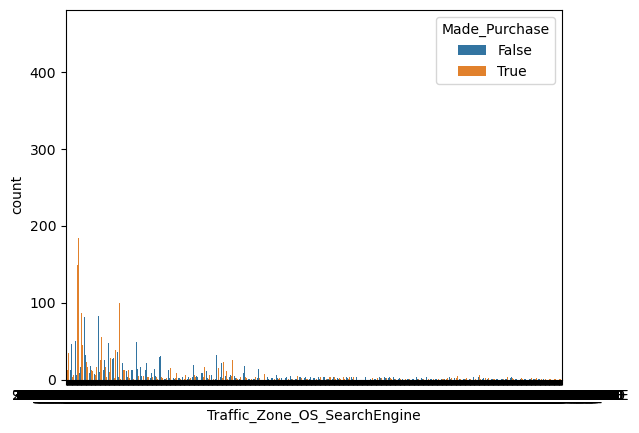

In [52]:
sns.countplot(x='Traffic_Zone_OS_SearchEngine',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='OS_SearchEngine', ylabel='count'>

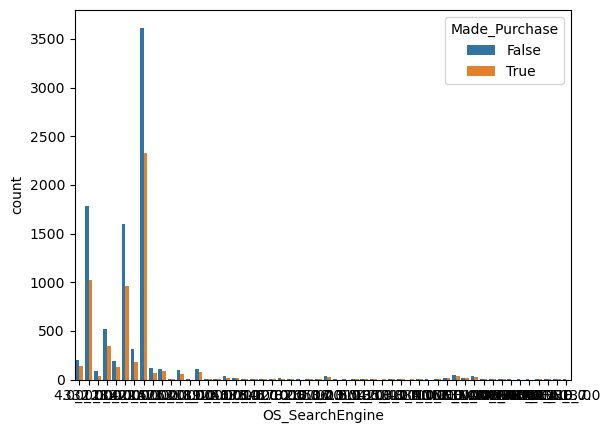

In [53]:
sns.countplot(x='OS_SearchEngine',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='MaritalStatus_Gender', ylabel='count'>

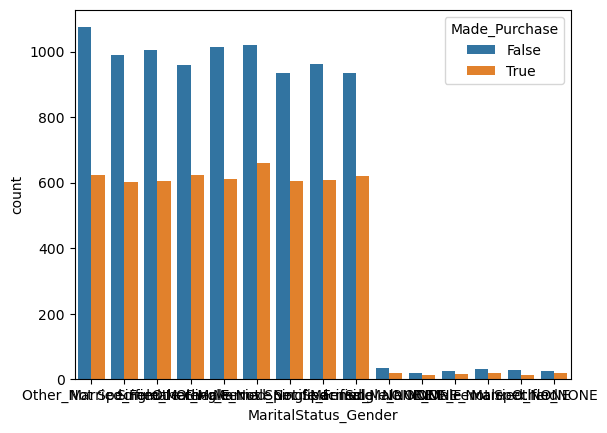

In [54]:
sns.countplot(x='MaritalStatus_Gender',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='Traffic_Zone', ylabel='count'>

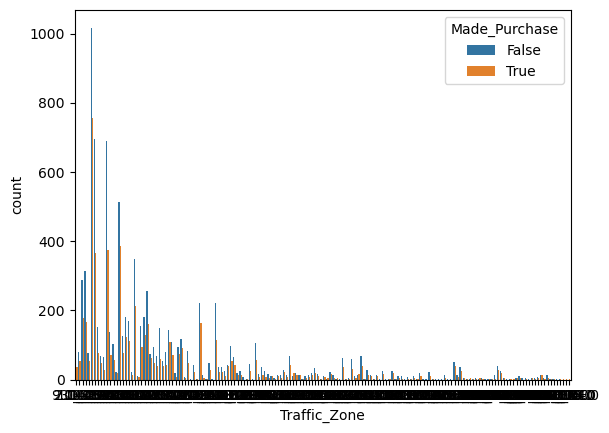

In [55]:
sns.countplot(x='Traffic_Zone',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='Seasonal_Month_Weekend', ylabel='count'>

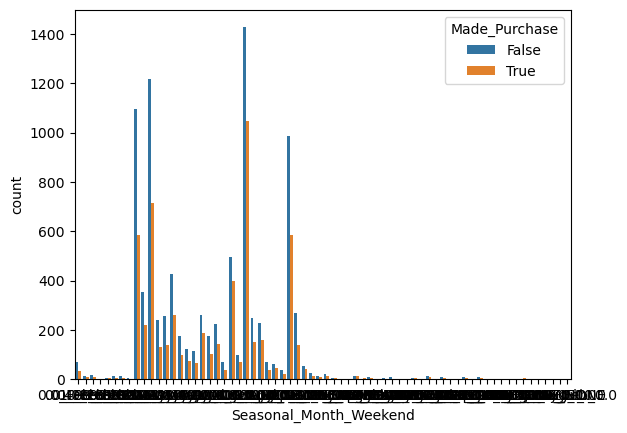

In [56]:
sns.countplot(x='Seasonal_Month_Weekend',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='Seasonal_Weekend', ylabel='count'>

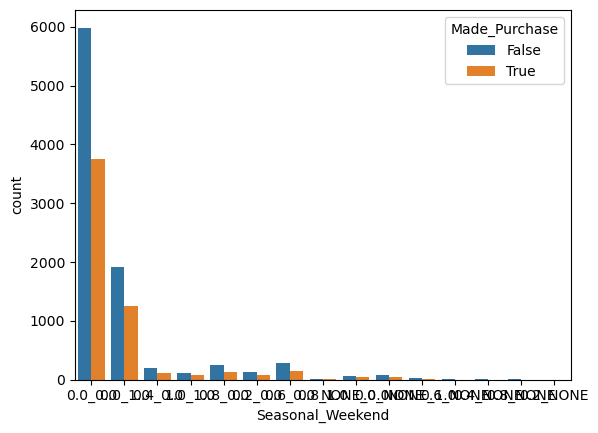

In [57]:
sns.countplot(x='Seasonal_Weekend',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='Seasonal_Month', ylabel='count'>

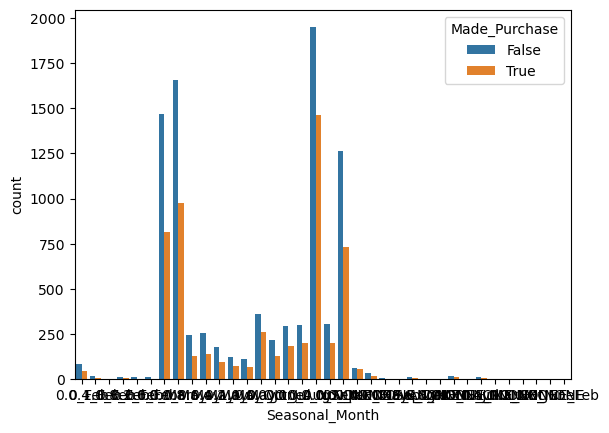

In [58]:
sns.countplot(x='Seasonal_Month',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='Month_Weekend', ylabel='count'>

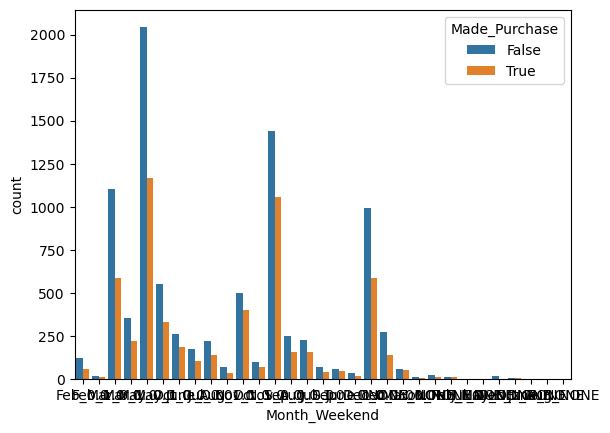

In [59]:
sns.countplot(x='Month_Weekend',data=train_df,hue='Made_Purchase')

<AxesSubplot:xlabel='Season_Traffic_Zone_OS_SearchEngine', ylabel='count'>

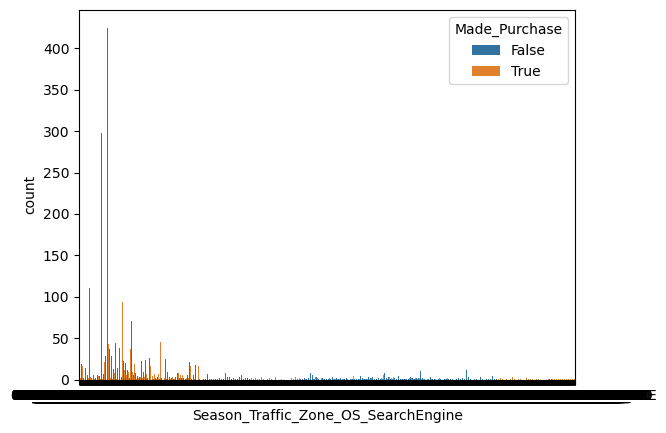

In [60]:

sns.countplot(x='Season_Traffic_Zone_OS_SearchEngine',data=train_df,hue='Made_Purchase')


In [61]:
[col for col in train_df.columns if train_df[col].dtype =='float64']

['HomePage_Duration',
 'LandingPage_Duration',
 'ProductDescriptionPage',
 'ProductDescriptionPage_Duration',
 'GoogleMetric:Bounce Rates',
 'GoogleMetric:Exit Rates',
 'GoogleMetric:Page Values',
 'Home_New',
 'Landing_New',
 'Product_New',
 'Diff_GoogleMetric_Rates',
 'Diff_GoogleMetric_Rates_PageValues']

In [62]:
num_cols=['HomePage_Duration',
 'LandingPage_Duration',
 'ProductDescriptionPage',
 'ProductDescriptionPage_Duration',
 'GoogleMetric:Bounce Rates',
 'GoogleMetric:Exit Rates',
 'GoogleMetric:Page Values',
 'Home_New',
 'Landing_New',
 'Product_New',
 'Diff_GoogleMetric_Rates',
 'Diff_GoogleMetric_Rates_PageValues']

In [63]:
cat_cols=['HomePage',
 'LandingPage',
 'SeasonalPurchase',
 'Month_SeasonalPurchase',
 'OS',
 'SearchEngine',
 'Zone',
 'Type of Traffic',
 'CustomerType',
 'Gender',
 'Cookies Setting',
 'Education',
 'Marital Status',
 'WeekendPurchase',
 'Seasonal_Month',
 'Seasonal_Weekend',
 'Month_Weekend',
 'Seasonal_Month_Weekend',
 'MaritalStatus_Gender',
 'Traffic_Zone',
 'OS_SearchEngine',
 'Traffic_Zone_OS_SearchEngine',
 'Season_Traffic_Zone_OS_SearchEngine',
 'CustomerType_Education']

In [64]:
used_cols=num_cols+cat_cols

In [65]:
used_cols

['HomePage_Duration',
 'LandingPage_Duration',
 'ProductDescriptionPage',
 'ProductDescriptionPage_Duration',
 'GoogleMetric:Bounce Rates',
 'GoogleMetric:Exit Rates',
 'GoogleMetric:Page Values',
 'Home_New',
 'Landing_New',
 'Product_New',
 'Diff_GoogleMetric_Rates',
 'Diff_GoogleMetric_Rates_PageValues',
 'HomePage',
 'LandingPage',
 'SeasonalPurchase',
 'Month_SeasonalPurchase',
 'OS',
 'SearchEngine',
 'Zone',
 'Type of Traffic',
 'CustomerType',
 'Gender',
 'Cookies Setting',
 'Education',
 'Marital Status',
 'WeekendPurchase',
 'Seasonal_Month',
 'Seasonal_Weekend',
 'Month_Weekend',
 'Seasonal_Month_Weekend',
 'MaritalStatus_Gender',
 'Traffic_Zone',
 'OS_SearchEngine',
 'Traffic_Zone_OS_SearchEngine',
 'Season_Traffic_Zone_OS_SearchEngine',
 'CustomerType_Education']

In [66]:
#to avoid unknown categories i'm using test data also for encoding
from sklearn import preprocessing
for col in cat_cols:
    lb = preprocessing.LabelEncoder()
    cat_var = pd.concat((train_df[col],test_df[col]),axis=0).astype('str')
    lb.fit(cat_var)
    train_df[col] = lb.transform(train_df[col].astype('str'))
    test_df[col] = lb.transform(test_df[col].astype('str'))

In [67]:
y=train_df[target]
X=train_df[used_cols]

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X[num_cols]=sc.fit_transform(X[num_cols])
test_df[num_cols]=sc.transform(test_df[num_cols])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [69]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [70]:
m = SelectFromModel(LinearSVC(C=0.01, penalty='l1', dual=False))

m.fit(X, y)

SelectFromModel(estimator=LinearSVC(C=0.01, dual=False, penalty='l1'))

In [71]:
X=m.transform(X)

In [72]:
X.shape

(14731, 18)

In [73]:
test_df_transformed=m.transform(test_df[used_cols])

In [74]:
test_df_transformed.shape

(6599, 18)

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [76]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
stacking_clf = StackingClassifier(
    estimators=[
        
        ('random_forest_clf', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16 ,random_state=42)),
        ('extra_trees_clf',ExtraTreesClassifier(random_state=42)),
        ('mlp_clf', MLPClassifier(random_state=42)),
        ('svc', SVC(kernel='rbf',random_state=42)),
        ('xgb',xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3))
    ],
    final_estimator=xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3),
    cv=5  # number of cross-validation folds
)
stacking_clf.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('random_forest_clf',
                                RandomForestClassifier(max_leaf_nodes=16,
                                                       n_estimators=500,
                                                       random_state=42)),
                               ('extra_trees_clf',
                                ExtraTreesClassifier(random_state=42)),
                               ('mlp_clf', MLPClassifier(random_state=42)),
                               ('svc', SVC(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None...
                                                 gamma=None, gpu_id=None,
                                                 grow_policy=None,
                                                 

In [77]:
y_pred=stacking_clf.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8004750593824228

In [79]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6911764705882353

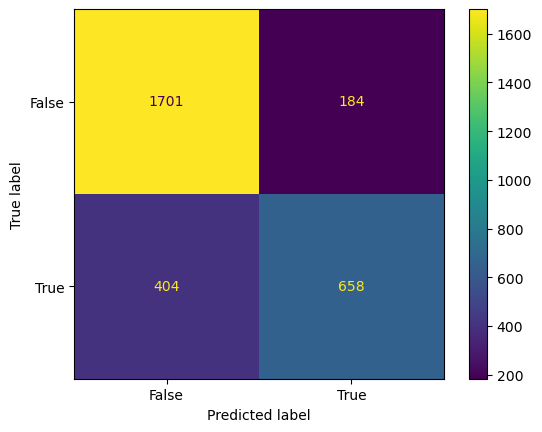

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [81]:
test_pred=stacking_clf.predict(test_df_transformed)
submission=pd.DataFrame(columns=['id','Made_Purchase'])
submission['id']=[i for i in range(len(test_pred))]
submission['Made_Purchase']=test_pred
submission.to_csv('submission.csv',index=False)